<a href="https://colab.research.google.com/github/hakim646/Artificial-Neural-Network-Model/blob/main/ANN_mph_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Nu_val=pd.read_csv('/content/drive/MyDrive/Learning/comsol/Nu_10.csv',sep=',')

In [ ]:
Nu_val.rename({'% Ri':'Ri','shi':'Speed Ratio','0.9/intop1(T)':'Nu'},axis = 1, inplace=True)

In [ ]:
Nu_val

,Ri,Speed Ratio,Nu
0,0.1,0.0,0.914974
1,0.1,0.1,0.914953
2,0.1,0.2,0.914946
3,0.1,0.3,0.914952
4,0.1,0.4,0.914972
...,...,...,...
436,10.0,1.6,0.943405
437,10.0,1.7,0.943655
438,10.0,1.8,0.943912
439,10.0,1.9,0.944176


# Correlation

In [ ]:
#plt.figure(figsize=(15,10))
#sns.heatmap(Nu_val.corr(method='pearson'), annot=True, cmap='RdPu')
#plt.show()

In [ ]:
#plt.figure(figsize=(8,8))
#sns.distplot(Nu_val['Nu'],color='blue')
#plt.show()#not normally distributed

In [ ]:
X=Nu_val.drop('Nu',axis=1)
Y=Nu_val.Nu

# Scaling of Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaler.fit(X)#training the data set

MinMaxScaler()

In [ ]:
#Applying Transformation
X_scaled=scaler.transform(X)
X_scaled

array([[0.  , 0.  ],
       [0.  , 0.05],
       [0.  , 0.1 ],
       [0.  , 0.15],
       [0.  , 0.2 ],
       [0.  , 0.25],
       [0.  , 0.3 ],
       [0.  , 0.35],
       [0.  , 0.4 ],
       [0.  , 0.45],
       [0.  , 0.5 ],
       [0.  , 0.55],
       [0.  , 0.6 ],
       [0.  , 0.65],
       [0.  , 0.7 ],
       [0.  , 0.75],
       [0.  , 0.8 ],
       [0.  , 0.85],
       [0.  , 0.9 ],
       [0.  , 0.95],
       [0.  , 1.  ],
       [0.05, 0.  ],
       [0.05, 0.05],
       [0.05, 0.1 ],
       [0.05, 0.15],
       [0.05, 0.2 ],
       [0.05, 0.25],
       [0.05, 0.3 ],
       [0.05, 0.35],
       [0.05, 0.4 ],
       [0.05, 0.45],
       [0.05, 0.5 ],
       [0.05, 0.55],
       [0.05, 0.6 ],
       [0.05, 0.65],
       [0.05, 0.7 ],
       [0.05, 0.75],
       [0.05, 0.8 ],
       [0.05, 0.85],
       [0.05, 0.9 ],
       [0.05, 0.95],
       [0.05, 1.  ],
       [0.1 , 0.  ],
       [0.1 , 0.05],
       [0.1 , 0.1 ],
       [0.1 , 0.15],
       [0.1 , 0.2 ],
       [0.1 ,

# Spliting of Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.15,random_state=4)

# Neural Network Model(Forward Propagation)

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop

In [ ]:
def ANN_MODEL():
  model=Sequential()#start with this 
  #Input Layer
  model.add(Dense(units=64, activation='relu', input_shape=[len(X.keys())]))#Connecting Neuron : units- number of neurons
  #Hidden Layer -1
  #there is any rule of finding optimum number of neuron
  model.add(Dense(units=128,activation='relu'))
  #Hidden Layer -2
  model.add(Dense(units=128,activation='relu'))
  #Hidden Layer-3
  model.add(Dense(units=256,activation='relu'))
  #Hidden Layer-4
  model.add(Dense(units=256,activation='relu'))
  #Output Layer
  #Activation function - ReLu
  model.add(Dense(units=1))

  #Optimizers
  optimizers=RMSprop(learning_rate=0.00001)
  model.compile(loss= 'mean_squared_error', optimizer=optimizers, metrics=['mean_squared_error','mean_absolute_error'])#for Linear Regression
  return model

In [ ]:
model_1 = ANN_MODEL()
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                192       
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 256)               33024     
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 124,097
Trainable params: 124,097
Non-tr

In [ ]:
ann_regr=model_1.fit(X_train,Y_train,batch_size=20,epochs=600,validation_split=0.1)

Epoch 1/600
17/17 [==============================] - 1s 17ms/step - loss: 0.8445 - mean_squared_error: 0.8445 - mean_absolute_error: 0.9189 - val_loss: 0.8315 - val_mean_squared_error: 0.8315 - val_mean_absolute_error: 0.9118
Epoch 2/600
17/17 [==============================] - 0s 6ms/step - loss: 0.8181 - mean_squared_error: 0.8181 - mean_absolute_error: 0.9044 - val_loss: 0.8095 - val_mean_squared_error: 0.8095 - val_mean_absolute_error: 0.8997
Epoch 3/600
17/17 [==============================] - 0s 5ms/step - loss: 0.7943 - mean_squared_error: 0.7943 - mean_absolute_error: 0.8912 - val_loss: 0.7875 - val_mean_squared_error: 0.7875 - val_mean_absolute_error: 0.8873
Epoch 4/600
17/17 [==============================] - 0s 5ms/step - loss: 0.7707 - mean_squared_error: 0.7707 - mean_absolute_error: 0.8778 - val_loss: 0.7659 - val_mean_squared_error: 0.7659 - val_mean_absolute_error: 0.8750
Epoch 5/600
17/17 [==============================] - 0s 5ms/step - loss: 0.7470 - mean_squared_erro

In [ ]:
err=pd.DataFrame(ann_regr.history)[['mean_squared_error','val_mean_squared_error']]

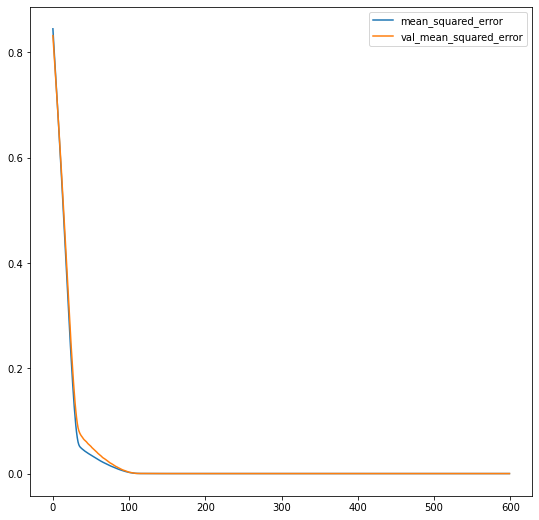

In [ ]:
err.plot(figsize=(9,9))

In [ ]:
Nu_prdct=model_1.predict(X_test)
#print(Nu_prdct)


numpy.ndarray

In [ ]:
test_df=pd.DataFrame(X_test,columns=['Ri','Speed Ratio'])

In [ ]:
test_df['Nu_predicted']=Nu_prdct

# Performance Metrics

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test, Nu_prdct)

0.9711380943883202

In [ ]:
test_df

,Ri,Speed Ratio,Nu_predicted
0,0.10,0.65,0.917181
1,0.00,0.55,0.914781
2,0.95,0.80,0.941216
3,0.95,0.35,0.939028
4,0.85,0.60,0.936851
...,...,...,...
62,0.20,0.80,0.919982
63,0.30,0.60,0.922350
64,0.05,0.60,0.916002
65,0.45,0.30,0.925069


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,Nu_prdct)

1.8303387548787103e-06

In [ ]:
rmse=np.sqrt(mean_squared_error(Y_test,Nu_prdct))

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test,Nu_prdct)

0.0012209934237566121

# weights and biases

In [ ]:
#weights and biases
#It will return two arrays where first array will be weight values
#second array will be bias values
weights=model_1.layers[0].get_weights()#For First Layer
#weights

In [ ]:
Weight=weights[0]#Weights for first layer

In [ ]:
bias = weights[1] #bias for first layer

# Comparing with CFD Data

In [ ]:
features=Nu_val.drop(['Nu'],axis = 1)
Nu_CFD=Nu_val.Nu

In [ ]:
Nu_CFD

0      0.914974
1      0.914953
2      0.914946
3      0.914952
4      0.914972
         ...   
436    0.943405
437    0.943655
438    0.943912
439    0.944176
440    0.944446
Name: Nu, Length: 441, dtype: float64

In [ ]:
X_vals=features[['Ri','Speed Ratio']].to_numpy()
#X_vals

In [ ]:
X_vals_scaled=scaler.transform(X_vals)
Nu_predicted=model_1.predict(X_vals_scaled)
#Nu_predicted

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
#X_vals_df=features.loc[:20,:]
#X_1=X_vals_df.drop(['Ri'],axis = 1)
#Speed_ratio=X_1.to_numpy()

In [ ]:
#for Ri=0.1 we have to take first 21 value pairs of speed ratio and Nu
Nu_ann=Nu_predicted[0:21,0] 
#len(Nu_ann)

In [ ]:
CFD_df=Nu_val.drop(['Ri'],axis = 1)
CFD_df=CFD_df.loc[0:20] 
len(CFD_df)

In [ ]:
CFD_df

,Speed Ratio,Nu
0,0.0,0.914974
1,0.1,0.914953
2,0.2,0.914946
3,0.3,0.914952
4,0.4,0.914972
5,0.5,0.915005
6,0.6,0.915051
7,0.7,0.915110
8,0.8,0.915181
9,0.9,0.915264


In [ ]:
result_1=CFD_df
result_1['Nu_Predicted']=Nu_ann.tolist()

In [ ]:
Err=(abs((result_1['Nu_Predicted']-result_1['Nu']))/result_1['Nu'])*100
result_1['% Error']=Err

In [ ]:
result_1

,Speed Ratio,Nu,Nu_Predicted,% Error
0,0.0,0.914974,0.912471,0.273495
1,0.1,0.914953,0.913354,0.174715
2,0.2,0.914946,0.914627,0.034823
3,0.3,0.914952,0.914265,0.075161
4,0.4,0.914972,0.913830,0.124821
5,0.5,0.915005,0.913687,0.144097
6,0.6,0.915051,0.913170,0.205561
7,0.7,0.915110,0.913091,0.220614
8,0.8,0.915181,0.913615,0.171042
9,0.9,0.915264,0.913954,0.143166


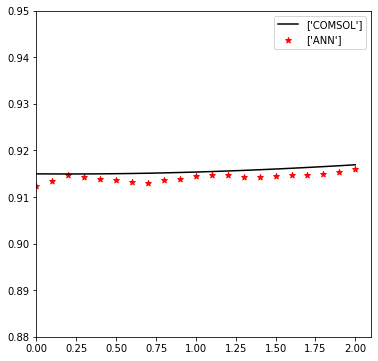

In [ ]:
plt.figure(figsize=(6,6))
#fig,ax=plt.subplots()
#plt.xscale('log')
plt.scatter(result_1['Speed Ratio'],result_1['Nu_Predicted'],color='red',marker='*',label=['ANN'])
#ax.set_xlabel('Ri')
#ax2=plt.twin()
plt.plot(result_1['Speed Ratio'],result_1['Nu'],color='black',label=['COMSOL'])
plt.xlim([0,2.1])
plt.ylim([0.88,0.95])
plt.legend()
plt.show()